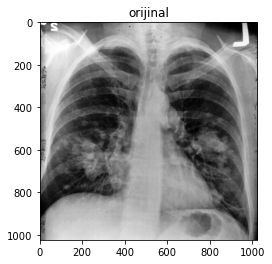

In [1]:
#Kütüphaneleri importlama
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io

%matplotlib inline

#resmi yüklüyoruz ve renkleri rgb formatına çeviriyoruz.
image = cv2.imread("C:/Users/UMUT/Desktop/resim/kanser.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Orjinal resmi göster.
plt.imshow(image)
plt.title('orijinal')
plt.show()



(1048576, 3)


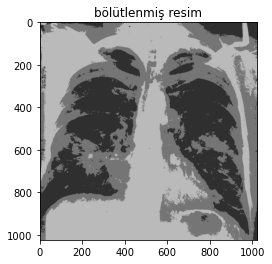

In [2]:
# Görüntüyü 2D piksel dizisine ve 3 renk değerine (RGB) yeniden şekillendirme)işlemi yapılır.
pixel_values = image.reshape((-1, 3))
# float'a çevirme ve piksel dizinin çıktısını gösterme.(pikselleri göstermek için ve k means algoritmasına resmi hazırlamak için)
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)
# aşağıdaki kod satırı, algoritmanın çalışmayı durdurması için kriterleri tanımlar, 
# gerçekleşecek olan 100 yineleme veya epsilon (gerekli doğruluk olan) çalıştırılır) 
#  doğruluk degeri %85 olur.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# küme sayısı(K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 8 bitlik değerlere döndürüyoruz.(K means algoritmasının görüntü bölütlemede kullanılması için 8 bitlik değerlere dönüşütürlmeli.)
centers = np.uint8(centers)

#labels dizisini düzleştiriyoruz.
labels = labels.flatten()

# piksellerin hepsini merkez rengine çeviriyoruz.(görüntünün bölütleme işleminin daha net olması için.)
segmented_image = centers[labels.flatten()]

#resmi orjinal boyutuna geri döndürüyoruz
segmented_image = segmented_image.reshape(image.shape)
# resmi göster
plt.imshow(segmented_image)
plt.title('bölütlenmiş resim')
plt.show()

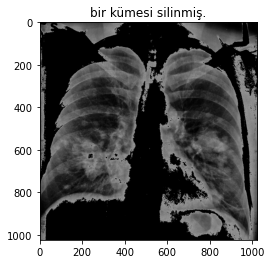

In [12]:
# siyaha çevirerek bir kümeyi siliyorum.
masked_image = np.copy(image)

masked_image = masked_image.reshape((-1, 3))
# silinecek küme
cluster = 1
masked_image[labels == cluster] = [0, 0, 0]
# eski haline getir 
masked_image = masked_image.reshape(image.shape)
# resmi göster.
plt.imshow(masked_image)
plt.title('bir kümesi silinmiş.')
plt.show()